# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

# makes sure charts appear in the notebook rather than a popup window
%matplotlib inline

## Challenge 1

#### The data we will use in this challenge is:

In [88]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

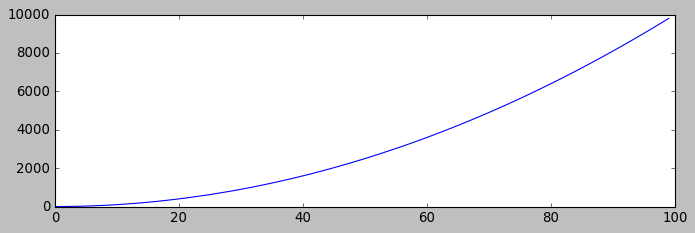

<Figure size 640x480 with 0 Axes>

In [242]:
# Method 1

plt.figure(figsize=(10,3))
plt.plot(x,y)
plt.show()

plt.savefig("./figures/graph_1.jpg")



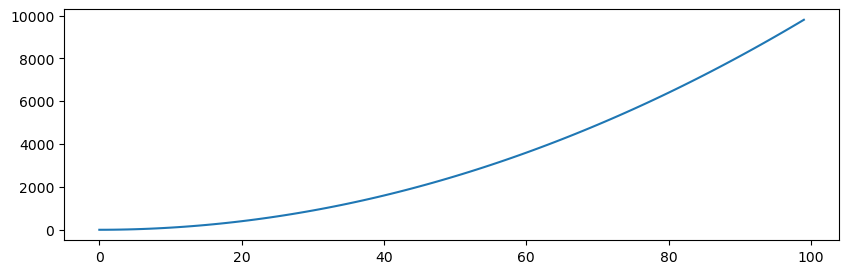

In [90]:
#Method 1

plt.figure(figsize=(10,3))
plt.plot(x,z)
plt.show()

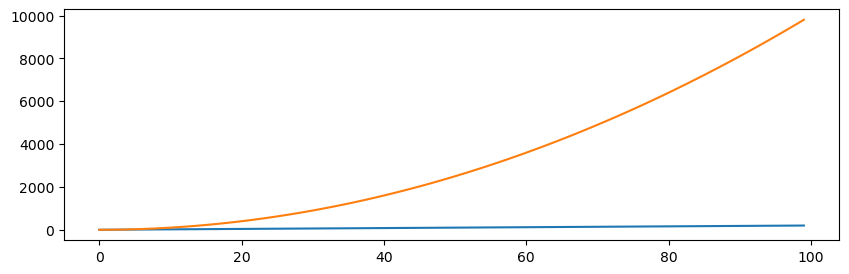

In [91]:
# Method 2

plt.figure(figsize=(10,3))
plt.plot(x,y)
plt.plot(x,z)
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

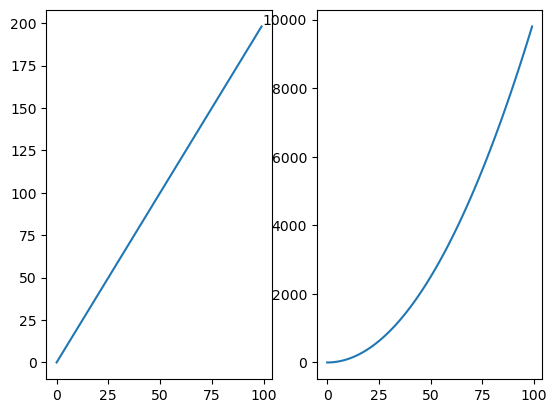

In [92]:
fig, axs = plt.subplots(1,2) #first parameter is the row, second is the column
axs[0].plot(x,y)
axs[1].plot(x,z)
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

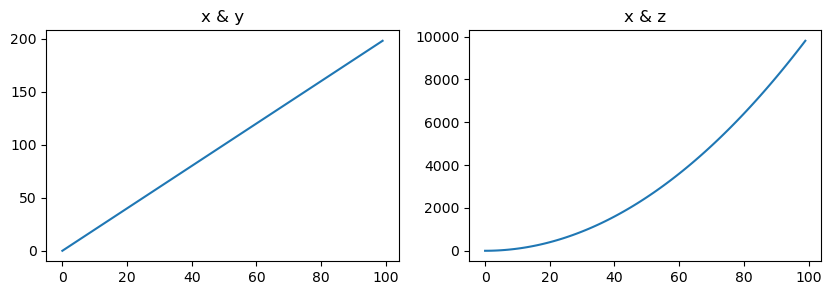

In [93]:
fig, axs = plt.subplots(1,2,figsize=(10,3)) 
axs[0].plot(x,y)
axs[1].plot(x,z)
axs[0].set_title('x & y')
axs[1].set_title('x & z')
plt.show()

#### Now you will have to plot both $y=x^2$ and $y=e^x$ in the same plot. Create two subplots and use a normal scale in the first one and a logarithmic scale in the second one.
**Hint**: Use `set_xscale` and `set_yscale`.

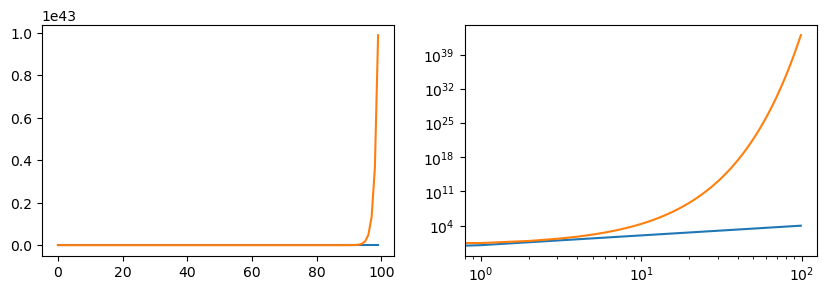

In [94]:
y = x*x
z = np.exp(x)

fig, axs = plt.subplots(1,2,figsize=(10,3)) 
axs[0].plot(x, y)
axs[0].plot(x, z)

axs[1].plot(x, y)
axs[1].plot(x, z)
plt.xscale('log') 
plt.yscale('log') 

plt.show()


#### As a bonus challenge, try to add a legend to the plot.

In [95]:
#will do if I finish the labs on time

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [96]:
# import data set from Ironhack's database

fitbit = pd.read_csv('Fitbit2.csv')

#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [97]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


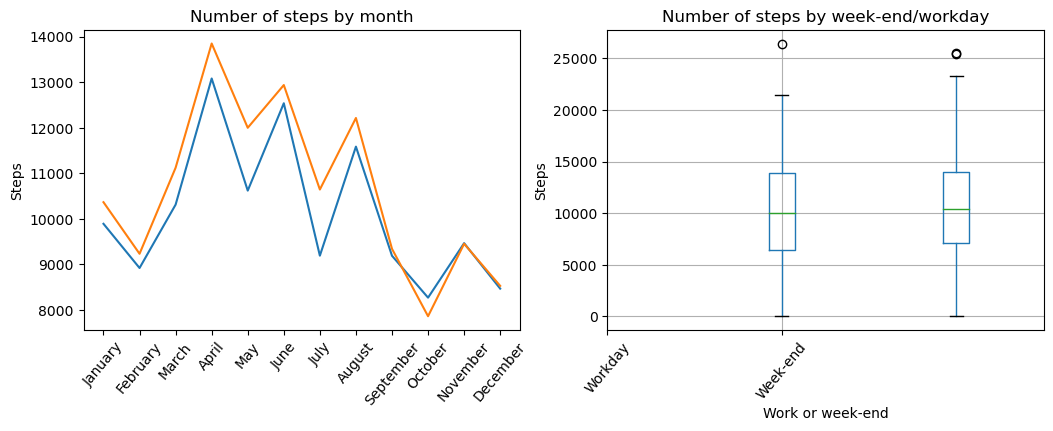

In [151]:
# MEDIAN STEPS BY MONTH_ENCODED

fig, axs = plt.subplots(1,2,figsize=(12,4)) 

average_months_encoded = fitbit.groupby("Months_encoded")["Steps"].mean()

medians=fitbit.groupby("Months_encoded")["Steps"].median()

axs[0].plot(average_months_encoded)
axs[0].plot(medians)
axs[0].set_title('Number of steps by month')
axs[0].set_ylabel('Steps')
axs[0].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
       rotation=50)

# MEDIAN STEPS BY WORK_OR_WEEKEND

boxplot = fitbit[['Work_or_Weekend', 'Steps']]

boxplot.boxplot(by='Work_or_Weekend', ax=axs[1], rot=50)

plt.title('Number of steps by week-end/workday')
plt.suptitle('')
axs[1].set_title('Number of steps by week-end/workday');
axs[1].set_ylabel('Steps');
axs[1].set_xlabel('Work or week-end');
plt.xticks([0, 1], ['Workday', 'Week-end'])
ax = plt.show()

#Question : why the x-ticks format are not well displayed using the boxplot?

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

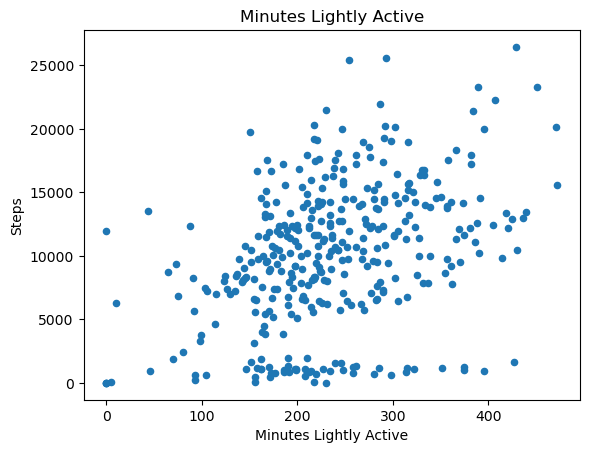

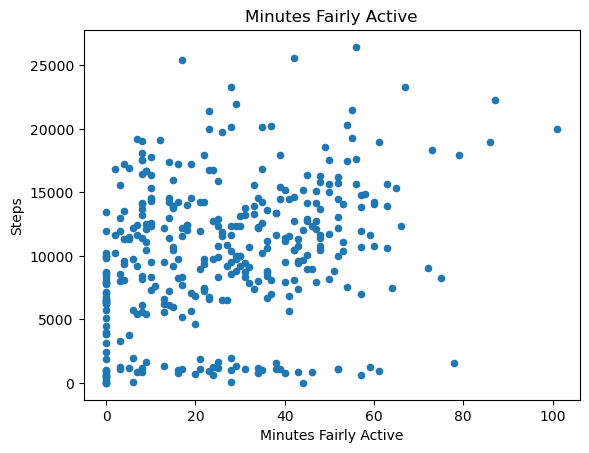

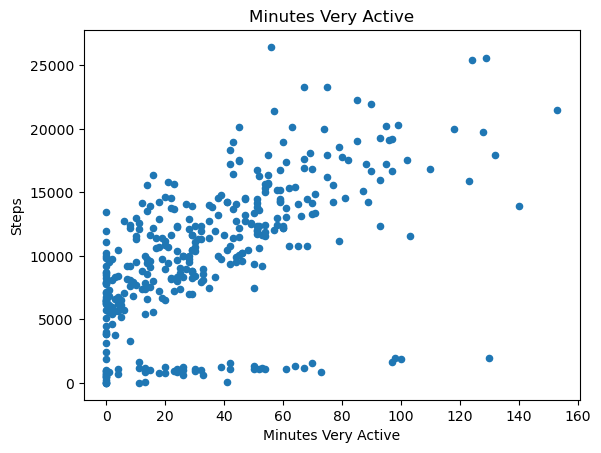

In [101]:
for i in ['Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active']:
    fitbit.plot(x=i, y="Steps", kind='scatter', title=i)
    
plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [154]:
# import data set from Ironhack's database

titanic = pd.read_csv('titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [155]:
# your code here

titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [156]:
# NUMERICAL VARIABLES

titanic.select_dtypes('number')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [157]:
# CATEGORICAL VARIABLES

titanic.select_dtypes('category')

""
0
1
2
3
4
...
1304
1305
1306
1307


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [190]:
plt.style.use('classic')
fig.set_size_inches(12, 6)

#### Use the right visulalization to show the distribution of column `Age`.

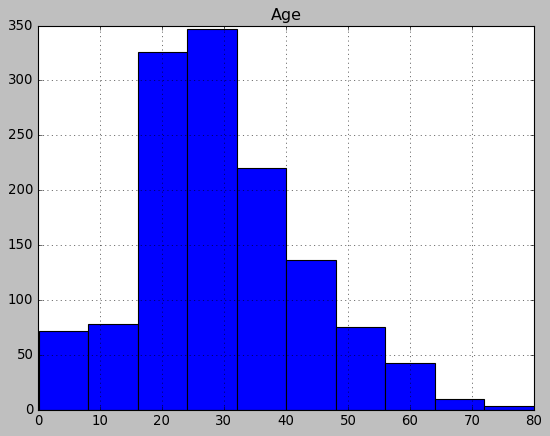

In [191]:
titanic.hist('Age');

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

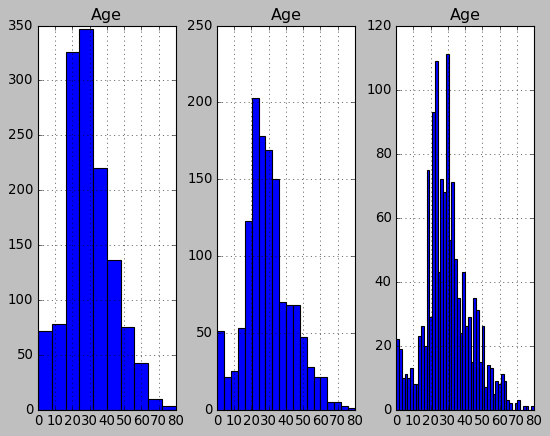

In [192]:
fig, axs = plt.subplots(1,3) #first parameter is the row, second is the column
titanic.hist("Age", bins = 10, ax=axs[0])
titanic.hist("Age", bins = 20, ax=axs[1])
titanic.hist("Age", bins = 50, ax=axs[2])
plt.show()


#### How does the bin size affect your plot?

In [176]:
"""
The bin size affects the number of rectangles within the chart, so bigger is the number of bins, bigger is the number of rectangles, and then thiner are the rectangles.
"""

'\nThe bin size affects the number of rectangles within the chart, so bigger is the number of bins, bigger is the number of rectangles, and then thiner are the rectangles.\n'

#### Use seaborn to show the distribution of column `Age`.

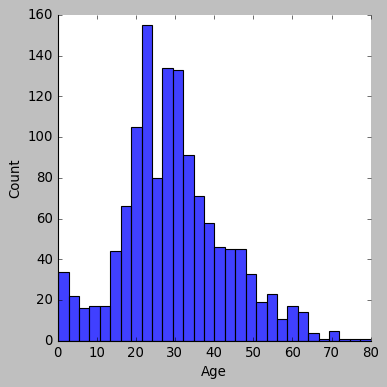

In [193]:
sns.displot(titanic, x="Age");

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

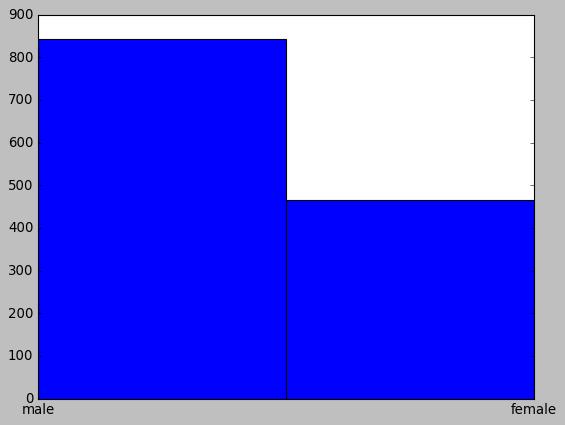

In [201]:
# Method 1 - matplotlib

plt.hist(titanic["Gender"], bins=2);

<AxesSubplot:xlabel='Gender', ylabel='Count'>

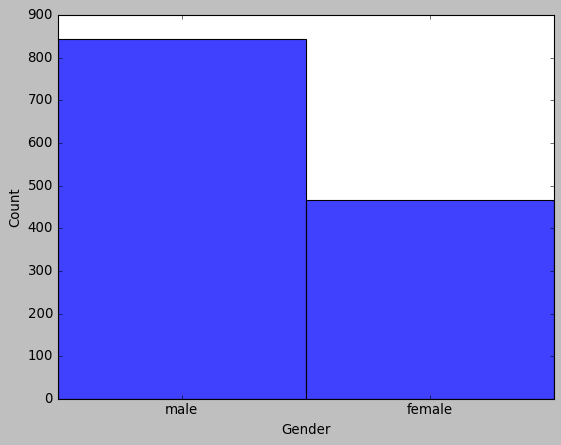

In [202]:
# Method 2 - seaborn

sns.histplot(data=titanic, x="Gender")

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:ylabel='Pclass'>

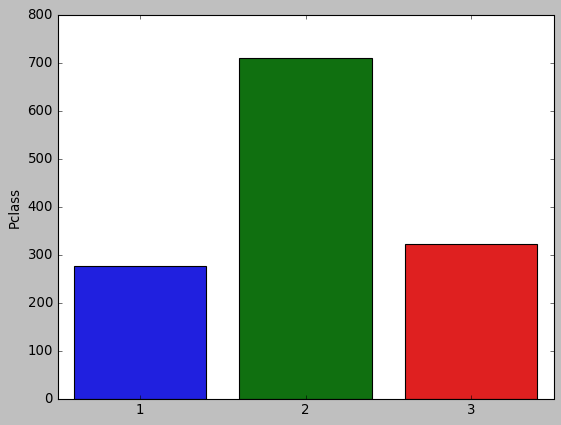

In [206]:
sns.barplot(y=titanic.groupby("Pclass")["Pclass"].value_counts(), x=titanic["Pclass"].unique())

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:>

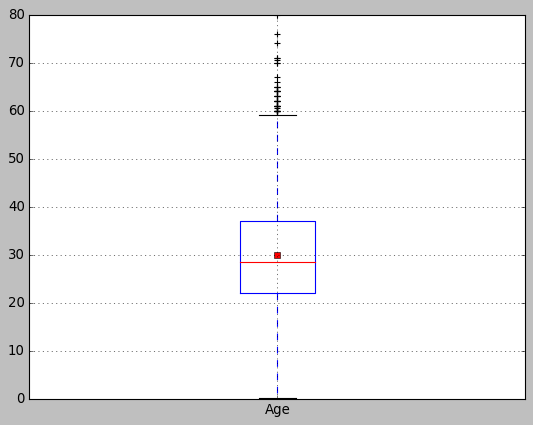

In [211]:
titanic.boxplot(column=['Age'], showmeans=True)

#### What does the last plot tell you about the feature `Age`?

In [116]:
"""
There are many outliers (people over 60 years), the mean age is of 30 years and the median is around 29 years old.
50% of the people on the Titanic were between 21 yo and 38 yo. 25% were between 38 yo and 59 yo, and 25% were between 0 yo and 21 yo.
"""

'\nyour comments here\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

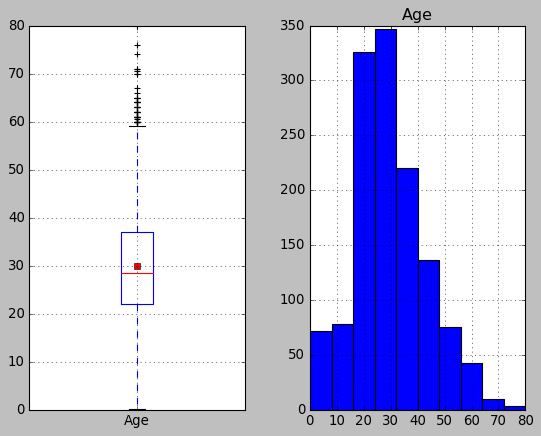

In [215]:
fig, axs = plt.subplots(1,2) #first parameter is the row, second is the column
titanic.boxplot(column=['Age'], showmeans=True, ax=axs[0])
titanic.hist("Age", ax=axs[1])
plt.show()


<AxesSubplot:xlabel='Age'>

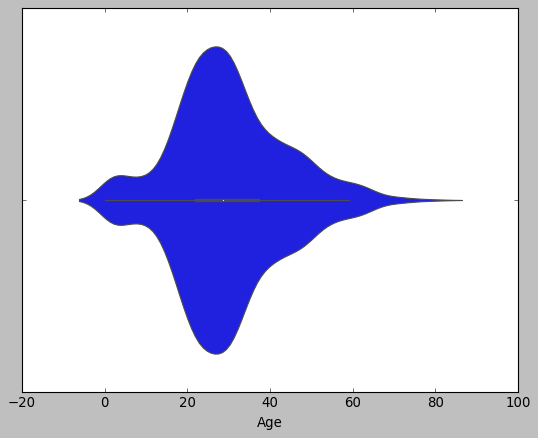

In [216]:
sns.violinplot(data=titanic, x='Age')

#### What additional information does the last plot provide about feature `Age`?

In [118]:
"""
The violin plot shows the full distribution of the data and the density.
It allows to quickly approximates where the data is centered and how it is spread.
Violin plots are similar to box plots, except that they also show the probability density of the data at different values. Typically a violin plot will include all the data that is in a box plot: a marker for the median of the data; a box or marker indicating the interquartile range; and possibly all sample points, if the number of samples is not too high.
A key advantage that violin plots have over histograms is that the use of a continuous function avoids the issue of having to choose bins. This gives a more authentic shape of the distribution independent of the number of bins you would choose.

Here, we see that the Age seems to have a right skewed distribution, and it seems to be unimodal (1 peak).
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

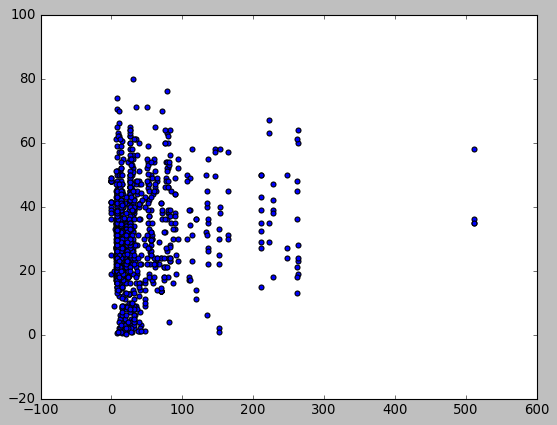

In [217]:
# Method 1 - matplotlib

plt.scatter(x=titanic["Fare"], y=titanic["Age"])

<AxesSubplot:xlabel='Fare', ylabel='Age'>

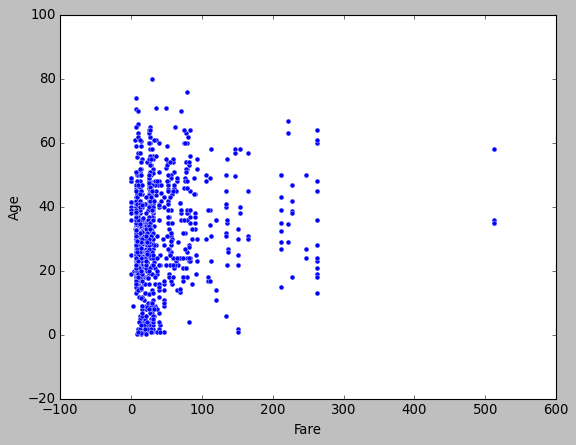

In [218]:
# Method 2 - seaborn

sns.scatterplot(x=titanic["Fare"], y=titanic["Age"])

#### Plot the correlation matrix using seaborn.

<AxesSubplot:>

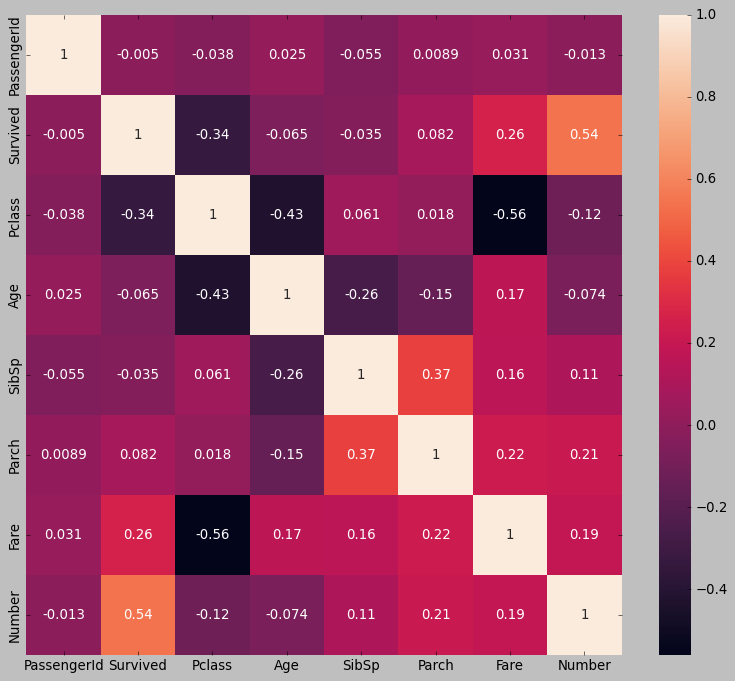

In [225]:
corr = titanic.corr()

f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True)

#### What are the most correlated features?

In [122]:
"""
The most correlated features are the Survived and the Number (0.54), the Survived and the Fare (0.26), and the SibSp and the Parch (0.37) that have a positive correlation.
However, the correlation is relatively weak from a general point of view.
"""

'\nyour comments here\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

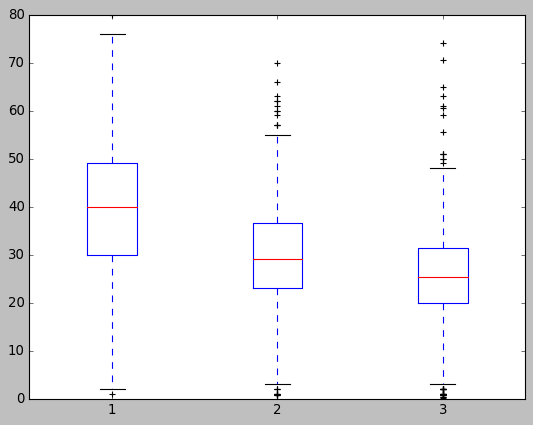

In [228]:
class1=titanic.loc[titanic['Pclass']==1]
class2=titanic.loc[titanic['Pclass']==2]
class3=titanic.loc[titanic['Pclass']==3]

plt.boxplot([class1['Age'], class2['Age'], class3['Age']])
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [239]:
sns.displot(titanic, x="Age", hue = "Age");
plt.show()

grid = sns.FacetGrid(titanic, col = "Gender", hue = "Age", col_wrap=2)
grid.map(sns.displot, "titanic", alpha=0.6)
grid.add_legend()
plt.show()

fg = sns.FacetGrid(data = titanic, col = 'Age')
fg.map(sns.scatterplot, 'Gender')
fg.add_legend()  

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fd8cbba1ee0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
#Didn't understand how to use facetgrid :/